In [1]:
import numpy as np

import pandas as pd

import cv2 , glob , os


In [2]:
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
img = cv2.imread(r"C:\Users\Balaji\Documents\pics\Balaji Kalva (2).jpg")

img

array([[[55, 79, 79],
        [57, 81, 81],
        [56, 80, 80],
        ...,
        [92, 92, 92],
        [91, 91, 91],
        [89, 89, 89]],

       [[56, 80, 80],
        [55, 79, 79],
        [55, 79, 79],
        ...,
        [94, 94, 94],
        [92, 92, 92],
        [91, 91, 91]],

       [[57, 81, 81],
        [54, 78, 78],
        [54, 78, 78],
        ...,
        [97, 97, 97],
        [95, 95, 95],
        [93, 93, 93]],

       ...,

       [[29, 53, 73],
        [30, 54, 74],
        [32, 56, 76],
        ...,
        [34, 44, 54],
        [33, 43, 53],
        [32, 42, 52]],

       [[28, 52, 72],
        [29, 53, 73],
        [31, 55, 75],
        ...,
        [34, 44, 54],
        [33, 43, 53],
        [31, 41, 51]],

       [[27, 51, 71],
        [29, 53, 73],
        [30, 54, 74],
        ...,
        [33, 43, 53],
        [32, 42, 52],
        [31, 41, 51]]], dtype=uint8)

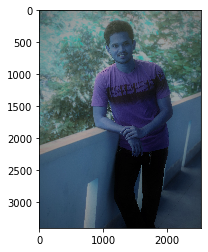

In [4]:
plt.imshow(img)

In [5]:
img.shape

(3404, 2531, 3)

In [6]:
img[0]

array([[55, 79, 79],
       [57, 81, 81],
       [56, 80, 80],
       ...,
       [92, 92, 92],
       [91, 91, 91],
       [89, 89, 89]], dtype=uint8)

# Grey pic generator

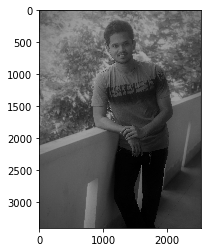

In [7]:
def grey_scale(img):
    
    grey = list()
    
    height , width , pixels = img.shape
    
    for i in range(height):
        
        for j in range(width):
            
            avg = int(np.average(img[i][j]))
            
            l = [avg] * 3
            
            grey.append(l)
            
    return np.array(grey).reshape(height,width,pixels)
            
plt.imshow(grey_scale(img))
            
        

# Reflection / Mirror Image

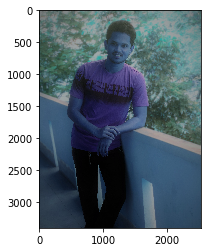

In [8]:
def reflect(img):
    
    height , width , pixels = img.shape
    
    ref = [0]*(height*width*pixels)
    
    ref = np.array(ref).reshape(height,width,pixels)
    
    for i in range(height):
        
        for j in range(width):
            
            ref[i][j] = img[i][width-1-j]
    
            
    return ref

plt.imshow(reflect(img))
        
        

## Edge Detection

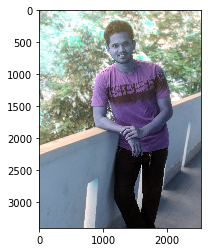

In [18]:
img = cv2.imread(r"C:\Users\Balaji\Documents\pics\Balaji Kalva.jpg")

plt.imshow(img)

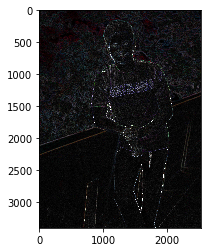

In [20]:
import math

def convert(a,b):
    
    n = int(math.sqrt((a**2)+(b**2)) + 0.5)
    
    if n > 255:
        
        return 255
    
    return n


def edge(image):
    
    X = [[-1,0,1],[-2,0,2],[-1,0,1]]
    Y = [[-1,-2,-1],[0,0,0],[1,2,1]]

    
    height , width , pixels = image.shape
    
    edges = list()
    
    for h in range(height):
        
        for w in range(width):
            
            rx = bx = gx = ry = by = gy = 0
            
            for i in range(-1,2):
                
                for j in range(-1,2):
                    
                     if (h+i >=0 and h+i < height and w+j >=0 and w+j < width):
                            
                            rx += image[h+i][w+j][0]*X[i+1][j+1]
                            gx += image[h+i][w+j][1]*X[i+1][j+1]
                            bx += image[h+i][w+j][2]*X[i+1][j+1]
                    
                            ry += image[h+i][w+j][0]*Y[i+1][j+1]
                            gy += image[h+i][w+j][1]*Y[i+1][j+1]
                            by += image[h+i][w+j][2]*Y[i+1][j+1]
                            
            
            
            edges.append(convert(rx,ry))
            edges.append(convert(gx,gy))
            edges.append(convert(bx,by))
            
            
    edges = np.array(edges).reshape(height,width,pixels)
            
    return edges

edge_pic = edge(img)

plt.imshow(edge_pic)

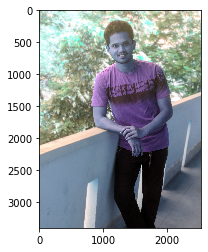

In [19]:
def blur(img):
    
    height,width,pixel = img.shape
    
    lst = list()
    
    for h in range(height):
        
        for w in range(width):
            
            #int red,green,blue,count
            
            red = green = blue = count = 0
            
            for i in range(-1,2):
                
                for j in range(-1,2):
                    
                    if (h+i >= 0 and h+i < height and w+j >= 0 and w+j < width):
                        
                        red += img[h+i][w+j][0]
                        green += img[h+i][w+j][1]
                        blue += img[h+i][w+j][2]
                        
                        count += 1
                        
            lst.append(int(red/count))
            
            lst.append(int(green/count))
            
            lst.append(int(blue/count))
            
    lst = np.array(lst).reshape(height,width,pixel)
    
    return lst

blur_pic = blur(img)

plt.imshow(blur_pic)
            
                        
                        
                        

In [21]:
blur_pic

array([[[176, 198, 179],
        [174, 196, 177],
        [170, 192, 173],
        ...,
        [251, 236, 217],
        [251, 234, 215],
        [251, 234, 215]],

       [[174, 196, 177],
        [172, 194, 175],
        [168, 190, 171],
        ...,
        [251, 236, 217],
        [251, 235, 216],
        [251, 234, 215]],

       [[172, 194, 175],
        [169, 191, 172],
        [165, 187, 168],
        ...,
        [252, 236, 218],
        [252, 235, 216],
        [252, 235, 216]],

       ...,

       [[118, 140, 165],
        [118, 140, 165],
        [118, 140, 165],
        ...,
        [128, 127, 135],
        [128, 127, 136],
        [128, 127, 136]],

       [[118, 140, 165],
        [118, 140, 165],
        [118, 140, 165],
        ...,
        [128, 127, 135],
        [128, 127, 136],
        [128, 127, 136]],

       [[118, 140, 165],
        [118, 140, 165],
        [118, 140, 165],
        ...,
        [128, 128, 136],
        [128, 127, 136],
        [128, 127, 136]]

In [22]:
img

array([[[177, 199, 180],
        [177, 199, 180],
        [172, 194, 175],
        ...,
        [251, 236, 217],
        [251, 234, 215],
        [250, 233, 214]],

       [[177, 199, 180],
        [173, 195, 176],
        [168, 190, 171],
        ...,
        [251, 236, 217],
        [252, 235, 216],
        [251, 234, 215]],

       [[175, 197, 178],
        [169, 191, 172],
        [164, 186, 167],
        ...,
        [252, 237, 218],
        [253, 236, 217],
        [252, 235, 216]],

       ...,

       [[118, 140, 165],
        [118, 140, 165],
        [118, 140, 165],
        ...,
        [129, 128, 137],
        [128, 127, 136],
        [128, 127, 136]],

       [[118, 140, 165],
        [118, 140, 165],
        [118, 140, 165],
        ...,
        [129, 128, 137],
        [129, 128, 137],
        [128, 127, 136]],

       [[119, 141, 166],
        [119, 141, 166],
        [119, 141, 166],
        ...,
        [129, 128, 137],
        [129, 128, 137],
        [129, 128, 137]]